https://machinelearningmastery.com/semi-supervised-learning-with-label-spreading/

https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html

https://blockgeni.com/understanding-semi-supervised-learning-with-label-spreading/

https://aicorespot.io/semi-supervised-learning-with-label-spreading/

# Import Library

# Import Notebook

In [47]:
%run notebook_model_ls.ipynb
%run notebook_model_lstm.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Taxonomy Classification Model (Label Spreading)

## ASRS Data Source

AutoLabeling sample_size= (20000, 6)
finding_factor


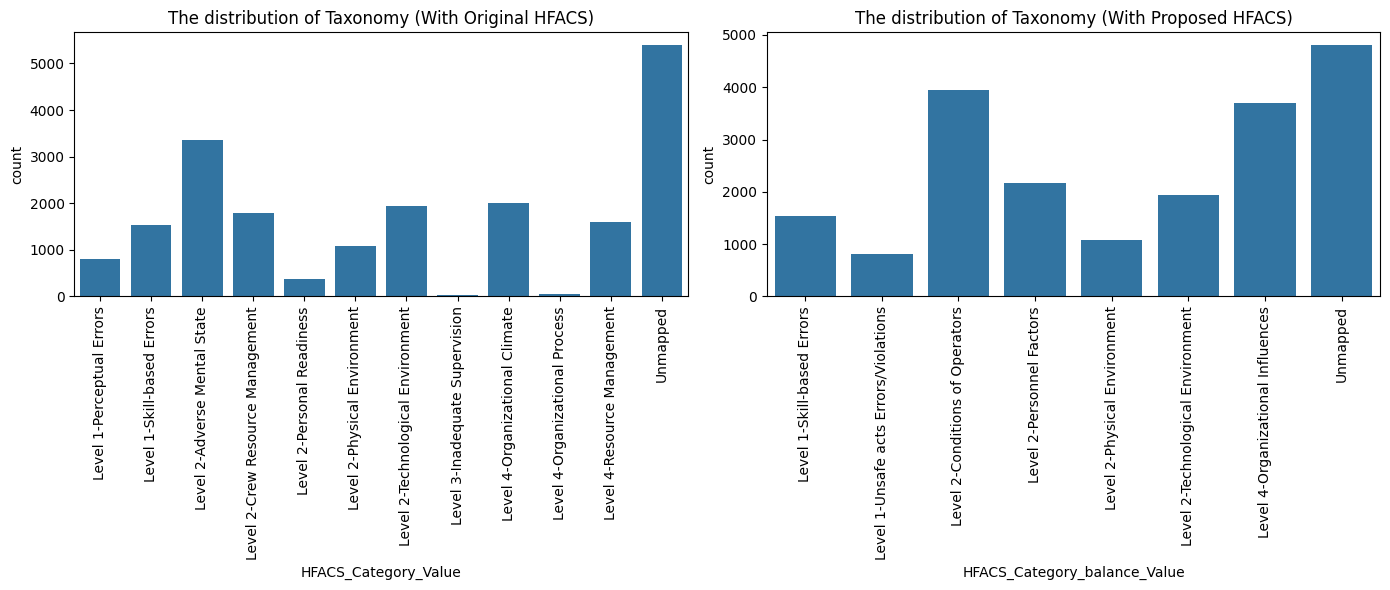

Shape of label tensor: (20000,)
Accuracy on test data: 0.9190523198420533


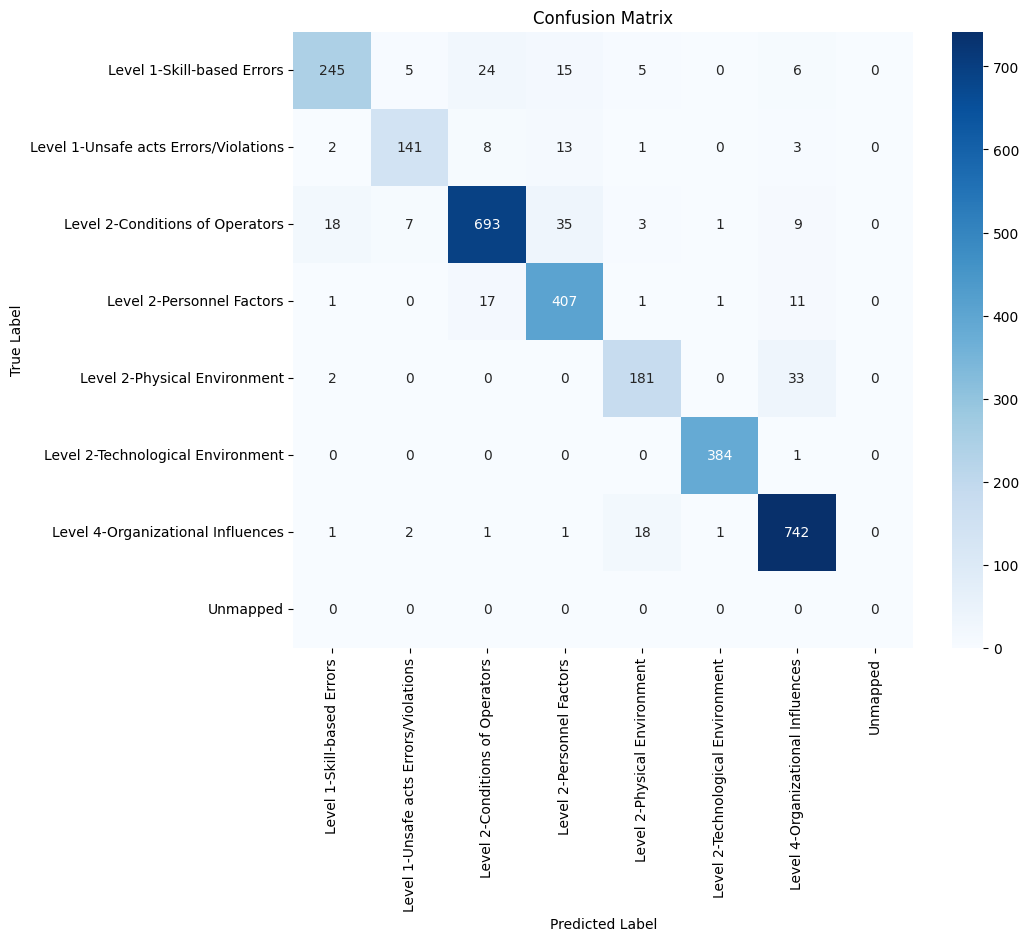

asrs Model and vectorizer saved successfully


In [38]:
options={ "is_merge_taxonomy": True }
# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2000, to_year=2023)
# asrs_df['finding_description'].value_counts()

# 02. Label Spreading
asrs_modelLS = ModelLS({'asrs': asrs_df}, 'asrs', 20000, options=options)
asrs_modelLS.train()

## NTSB Dats Source

AutoLabeling sample_size= (18537, 6)
finding_factor


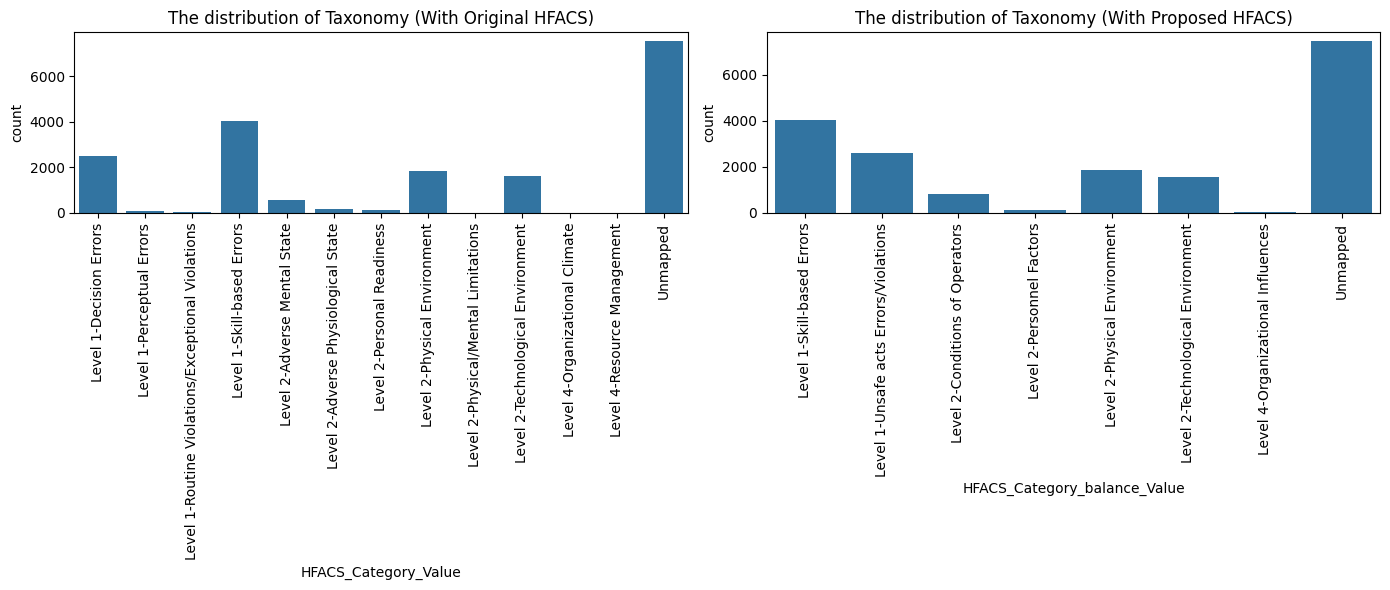

Shape of label tensor: (18537,)
Accuracy on test data: 1.0


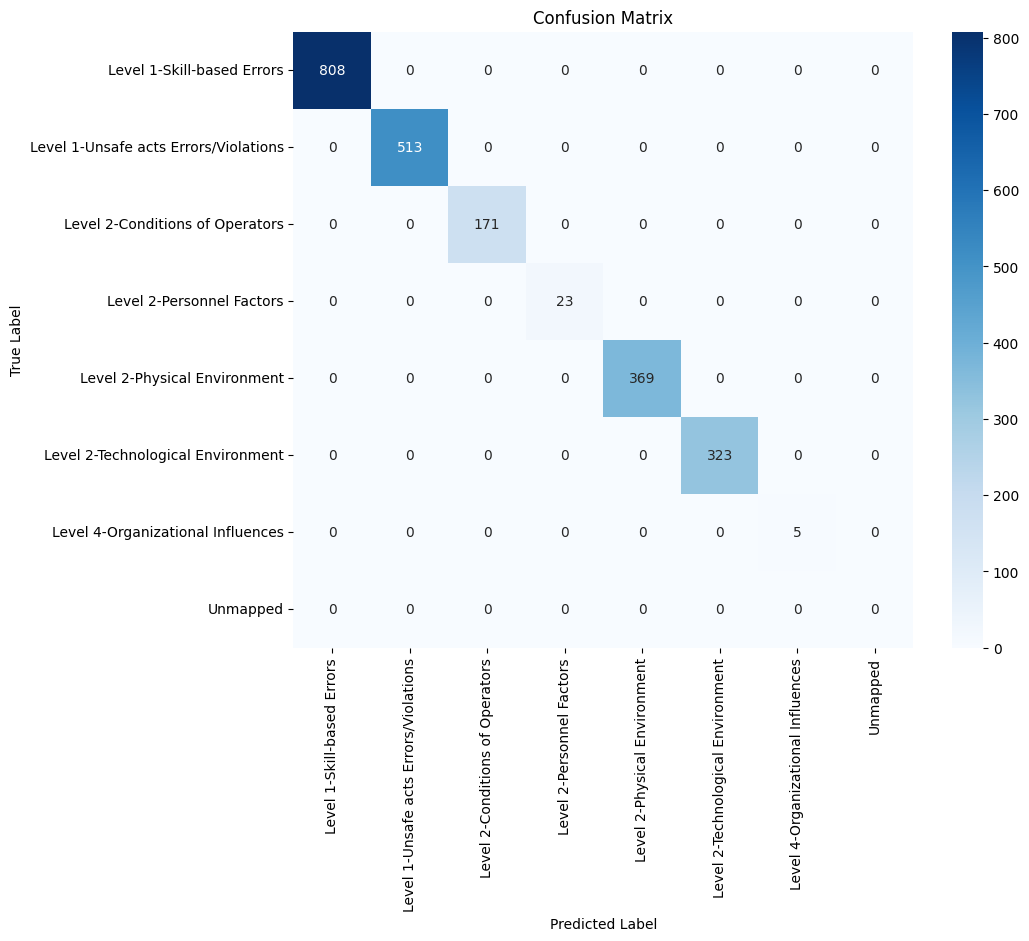

ntsb Model and vectorizer saved successfully


In [39]:
options={ "is_merge_taxonomy": True }
# 01. Get Data
ntsb_df = CoreUtils.get_data('ntsb', from_year=2000, to_year=2023)


ntsb_modelLS = ModelLS({'ntsb': ntsb_df}, 'ntsb', 20000, options=options)
ntsb_modelLS.train()

## ASRS + NTSB 

AutoLabeling sample_size= (10000, 6)
finding_factor


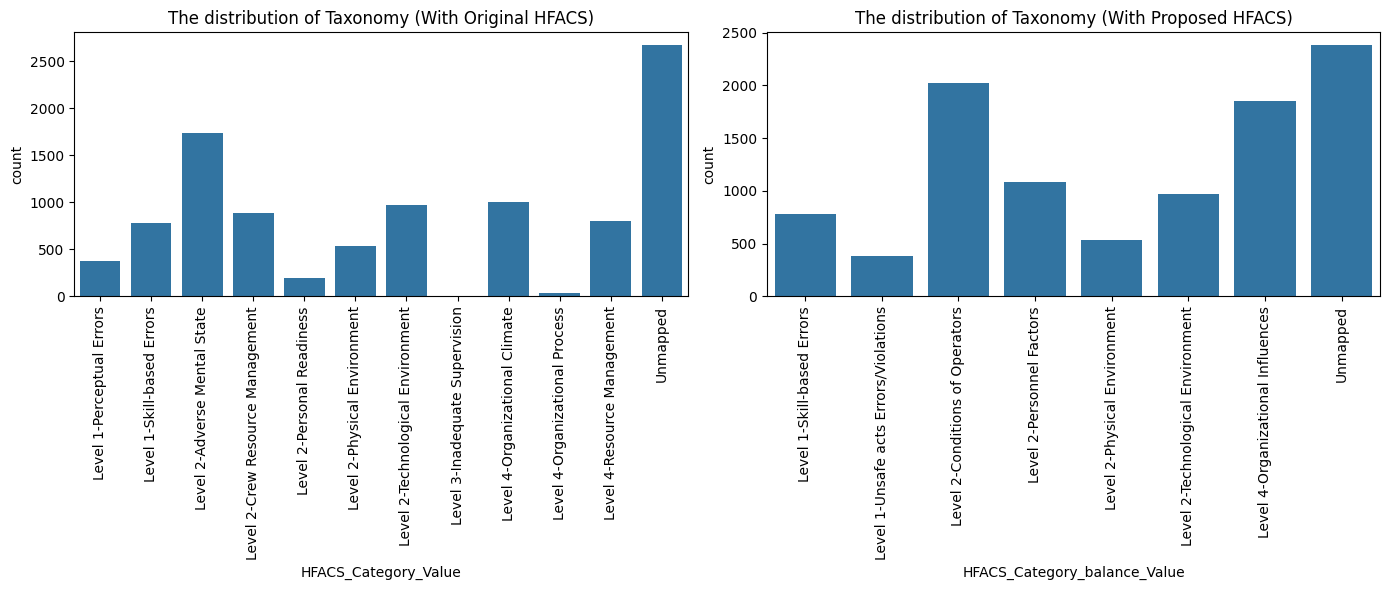

AutoLabeling sample_size= (10000, 6)
finding_factor


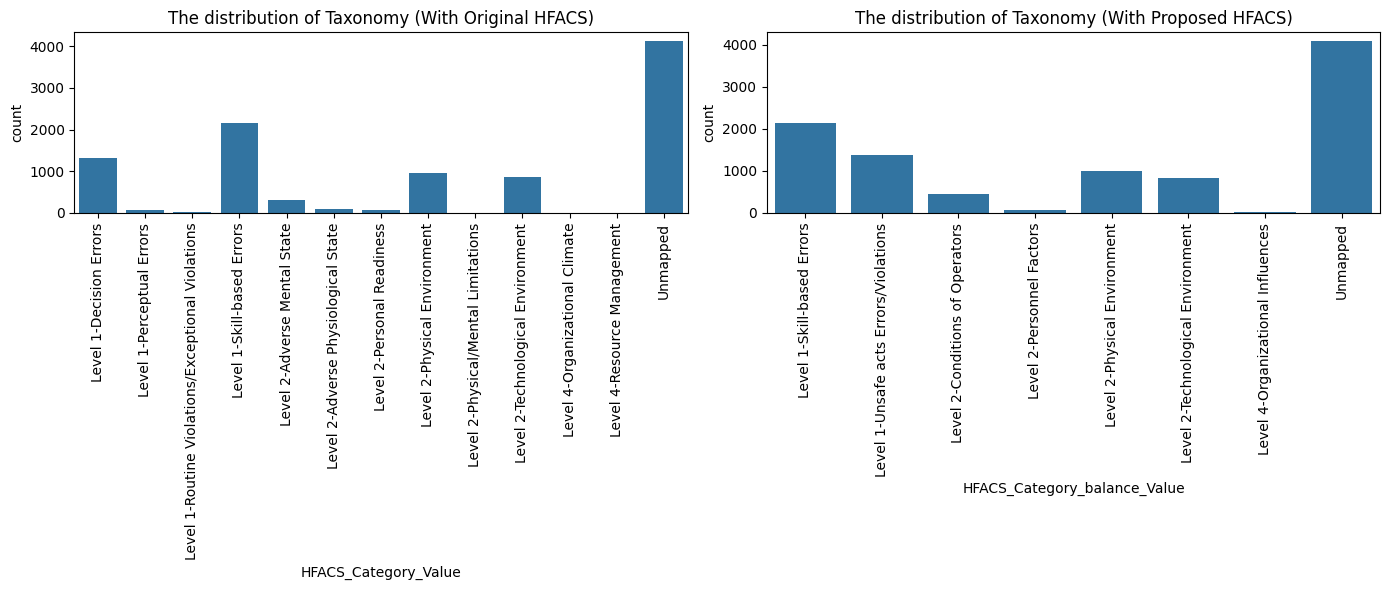

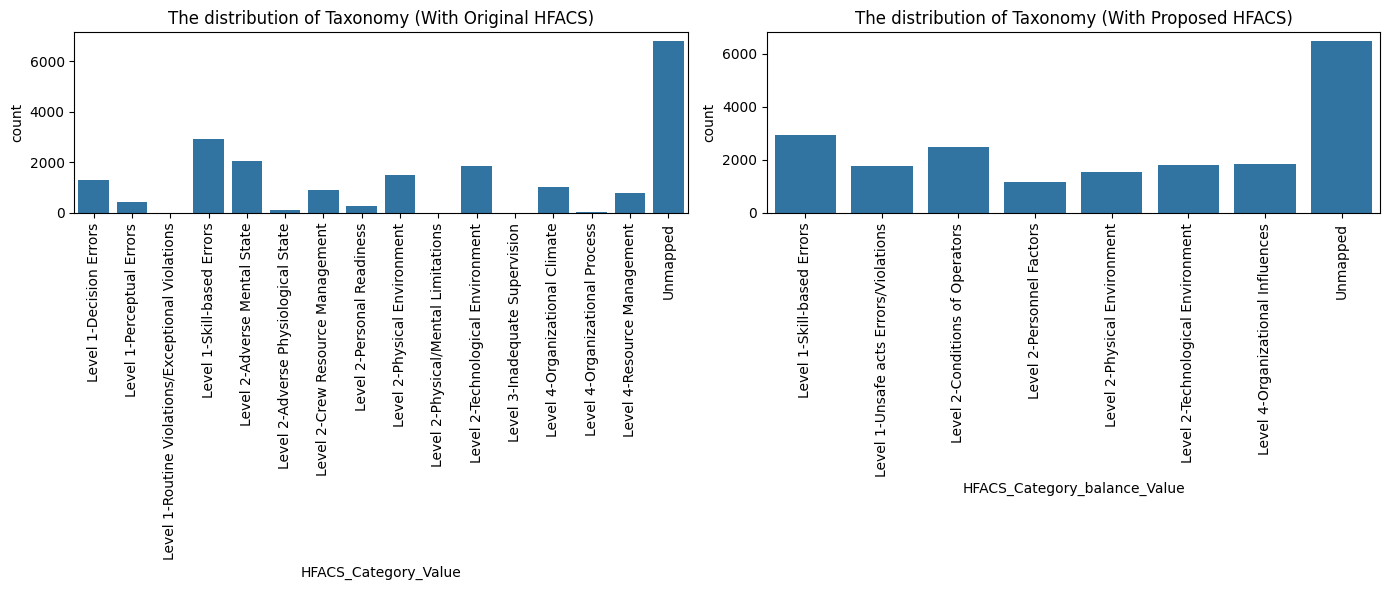

Shape of label tensor: (20000,)
Accuracy on test data: 0.9582255083179297


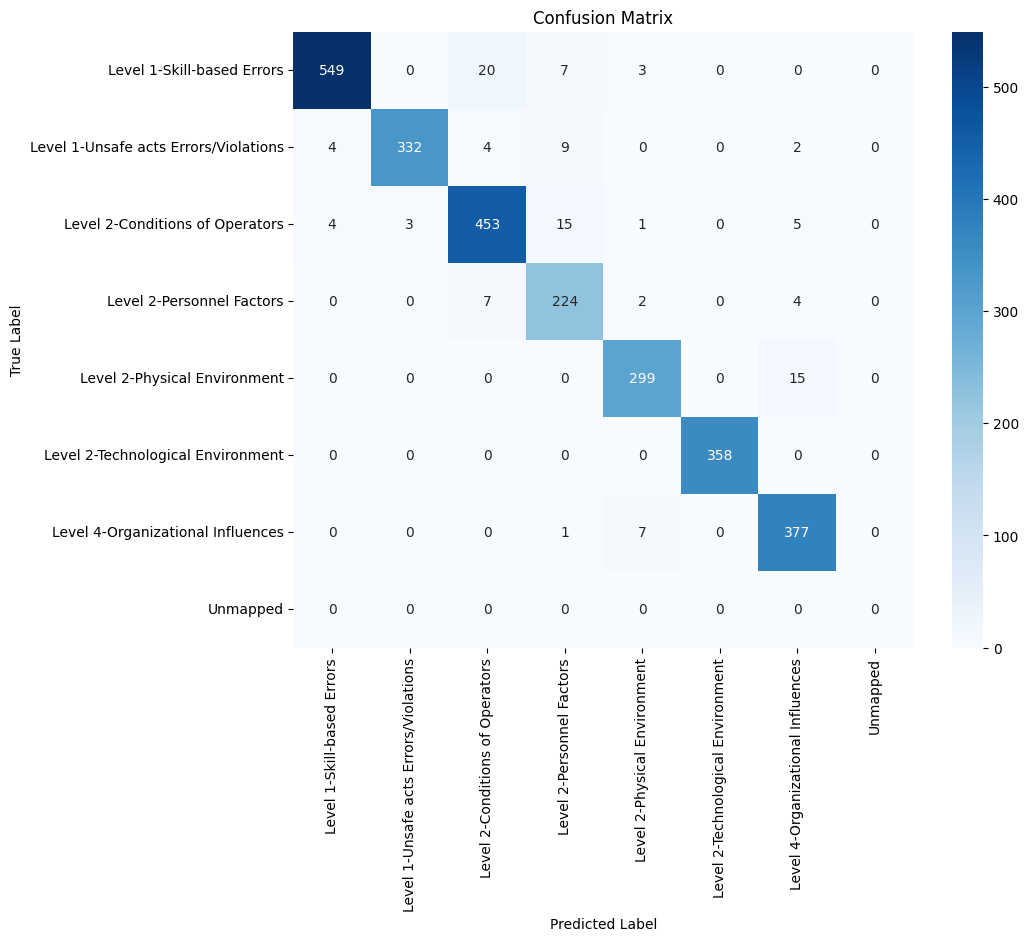

asrs_ntsb Model and vectorizer saved successfully


In [40]:
options={ "is_merge_taxonomy": True }
# 01. Manual Labeling with specific sample
asrs_df = CoreUtils.get_data('asrs', from_year=2000, to_year=2023)
ntsb_df = CoreUtils.get_data('ntsb', from_year=2000, to_year=2023)

asrs_ntsb_modelLS = ModelLS({'asrs': asrs_df, 'ntsb': ntsb_df}, 'asrs_ntsb', 10000, options=options)
asrs_ntsb_modelLS.train()

# Human Factors Prediction Model (LSTM)

## ASRS

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (9937, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
        event_id        date           finding_factor  \
114340   2021216  2023-07-01    Situational Awareness   
208299   2012024  2023-07-01  Communication Breakdown   
210852   1865826  2022-01-01                      MEL   
210857   1865938  2022-01-01          Troubleshooting   
210858   1866018  2022-01-01          Troubleshooting   

                                      finding_description  \
114340  Ambiguous-Chart Or Publication; Human Factors-.

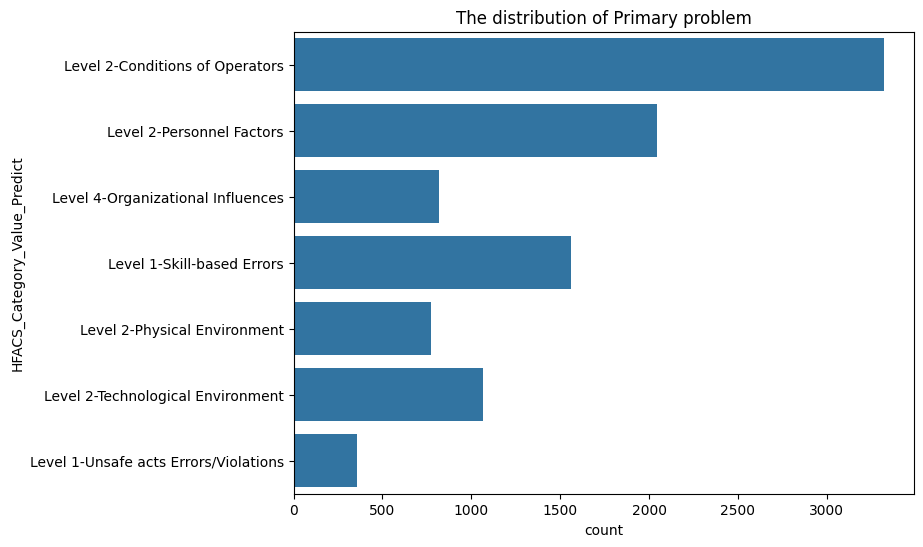

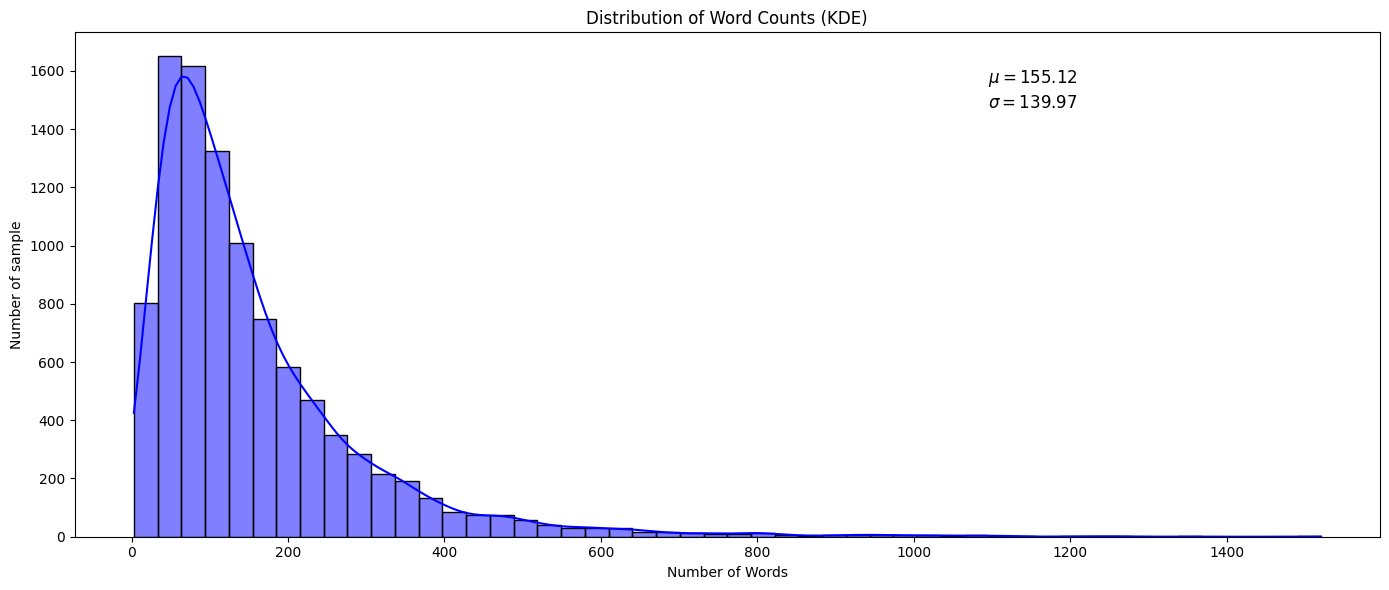

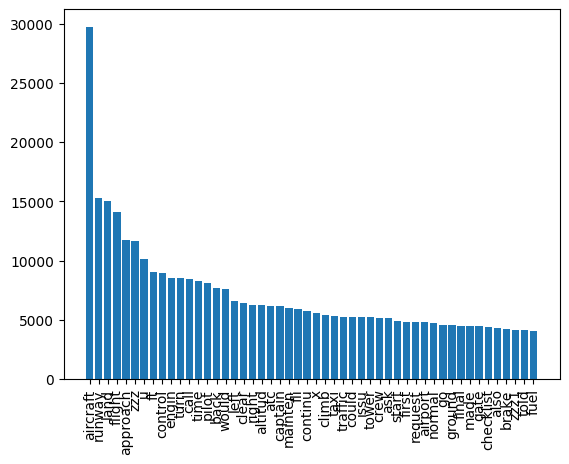

Total unique words: 28529
Define Y
Shape of label tensor: (9937,)
Define X
Found 28530 unique tokens.
Shape of data tensor: (9937, 200)
(6955, 200) (6955,)
(2982, 200) (2982,)
2    991
3    607
0    454
5    310
6    257
4    245
1    118
Name: count, dtype: int64
Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 37s 148ms/step - accuracy: 0.2931 - loss: 1.9177 - val_accuracy: 0.3578 - val_loss: 1.7251
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 148ms/step - accuracy: 0.3323 - loss: 1.7726 - val_accuracy: 0.3578 - val_loss: 1.7070
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 151ms/step - accuracy: 0.3340 - loss: 1.7447 - val_accuracy: 0.3549 - val_loss: 1.6871
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 143ms/step - accuracy: 0.3268 - loss: 1.7290 - val_accuracy: 0.3779 - val_loss: 1.6316
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 144ms/step - accuracy: 0.3692 - loss: 1.6258 - val_accuracy: 0.3922 - val_loss: 1.5951
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.3714 - loss

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

311/311 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step


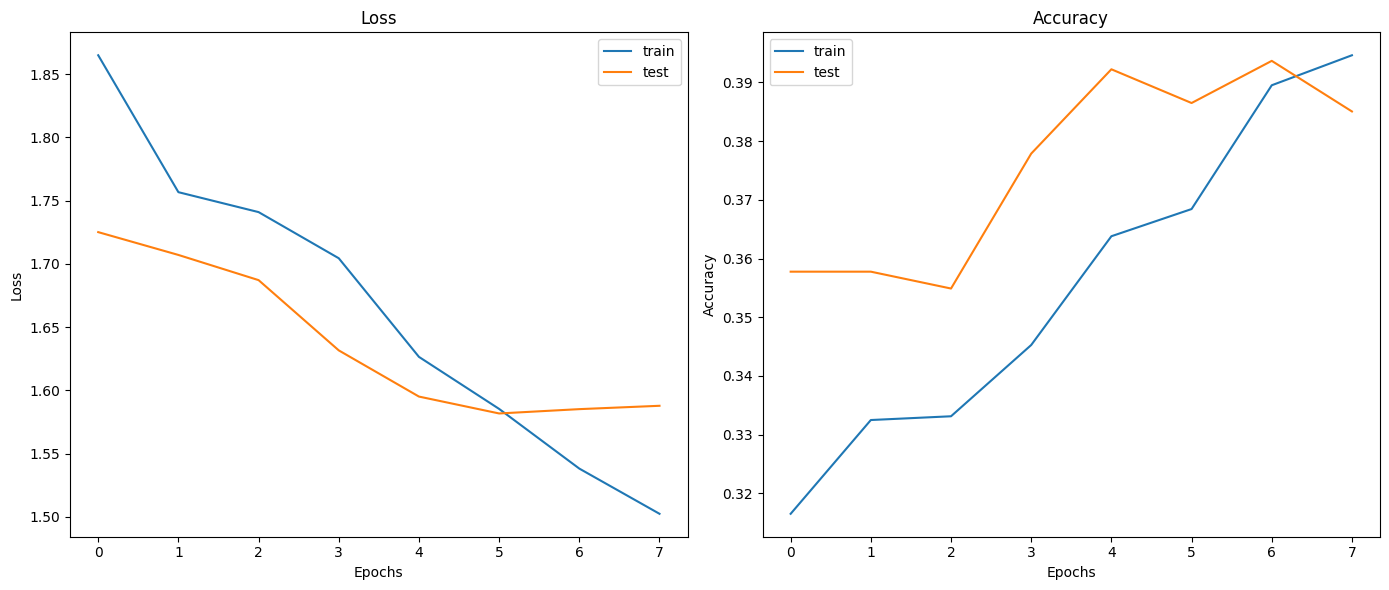

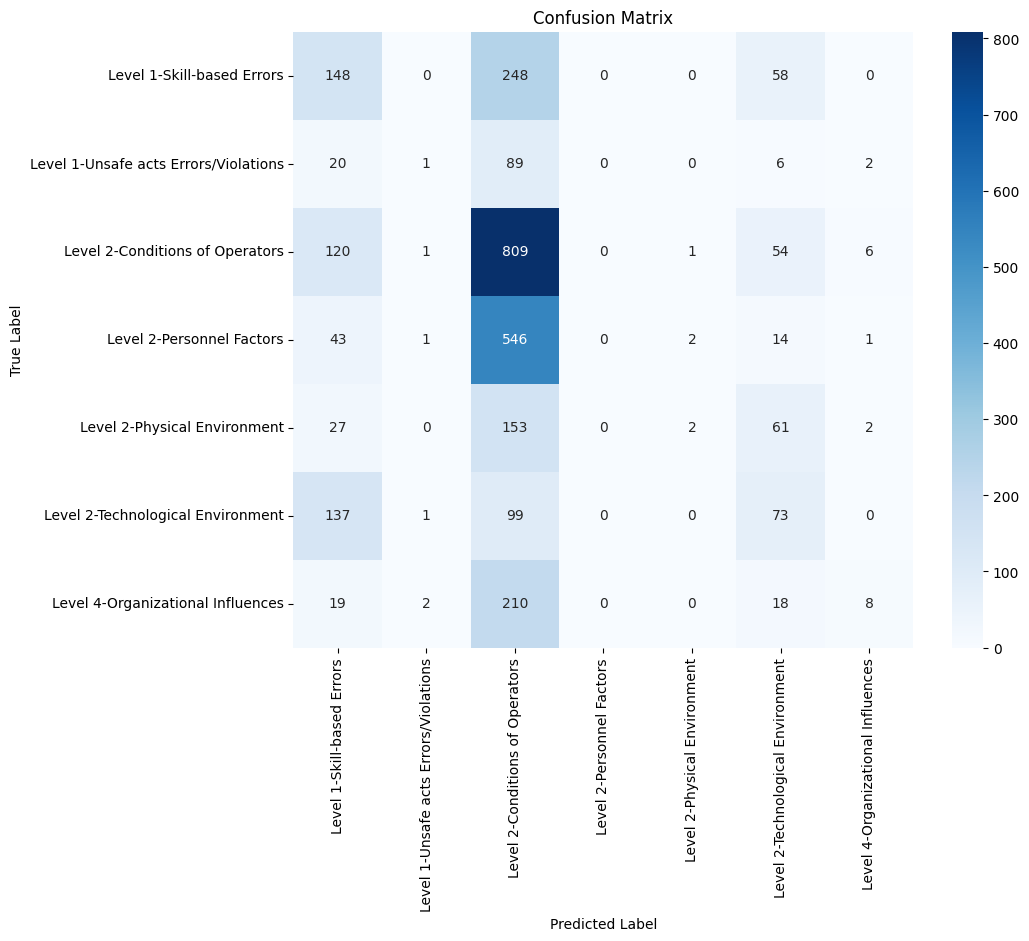

Accuracy: 0.3491
Macro F1 Score: 0.1652
Micro F1 Score: 0.3491
Weighted F1 Score: 0.2500


In [53]:
from sklearn.metrics import f1_score, accuracy_score

options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "ls_name": 'asrs_ntsb', # Due to outperform than others
    "ls_version": 1
}

# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2022, to_year=2023)
dfs = { 'asrs': asrs_df }

asrs_lstm_Model = LSTMModel(dfs, ds_name='asrs', options=options)
asrs_lstm_Model.train()
evaluate_result = asrs_lstm_Model.evaluate()

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
y_true = asrs_lstm_Model.Y_test
y_pred = asrs_lstm_Model.Y_pred


accuracy = accuracy_score(y_true, y_pred)
macro_f1_score = f1_score(y_true, y_pred, average='macro')
micro_f1_score = f1_score(y_true, y_pred, average='micro')
weighted_f1_score = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Macro F1 Score: {macro_f1_score:.4f}')
print(f'Micro F1 Score: {micro_f1_score:.4f}')
print(f'Weighted F1 Score: {weighted_f1_score:.4f}')

## NTSB

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4395, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
             event_id        date  \
14127  20180102X44607  2018-01-01   
14130  20180102X11535  2018-01-01   
14132  20180101X32947  2018-01-01   
14135  20180108X90308  2018-01-01   
14137  20180109X45300  2018-01-01   

                                          finding_factor  \
14127      Aircraft-Aircraft systems-Landing gear system   
14130  Personnel issues-Psychological-Perception/orie...   
14132      Aircraft-Aircraft systems-Landing gear system

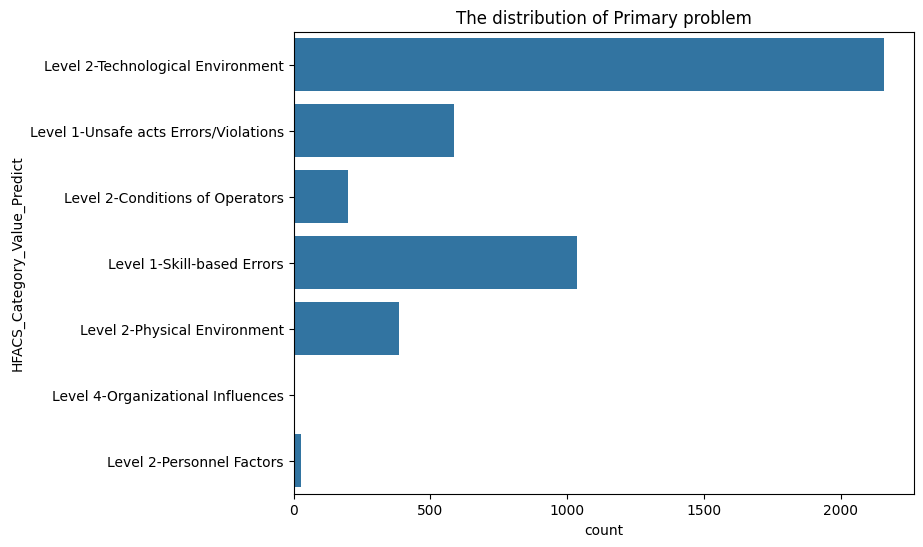

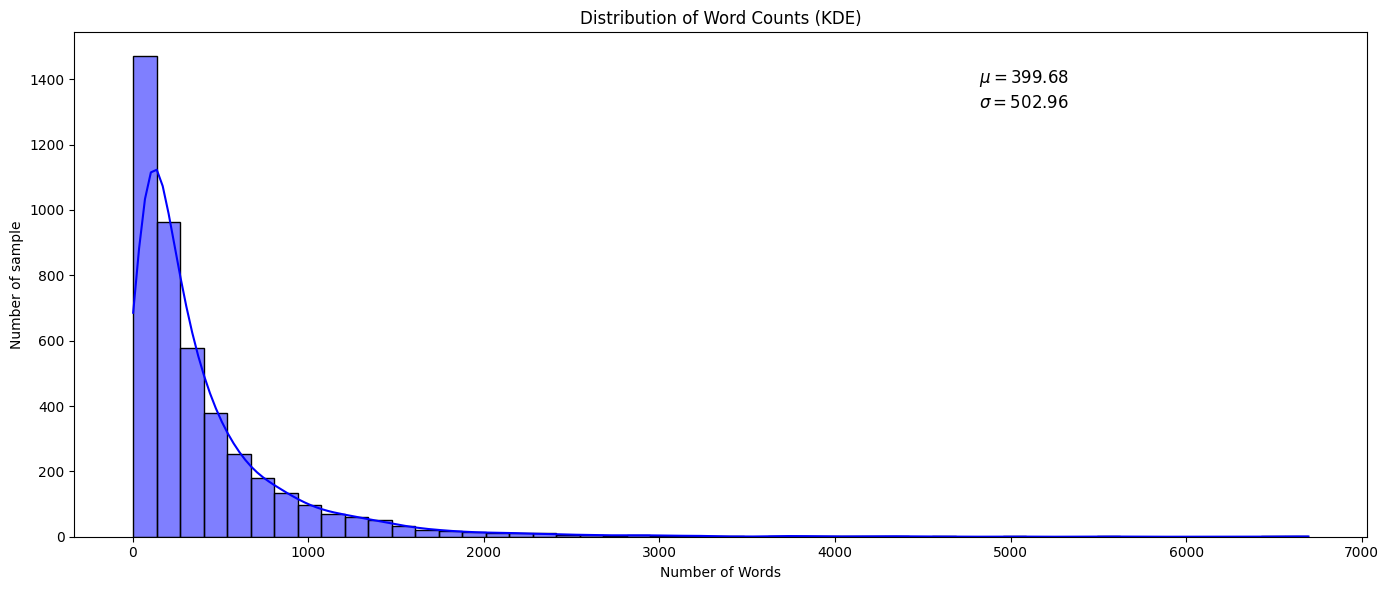

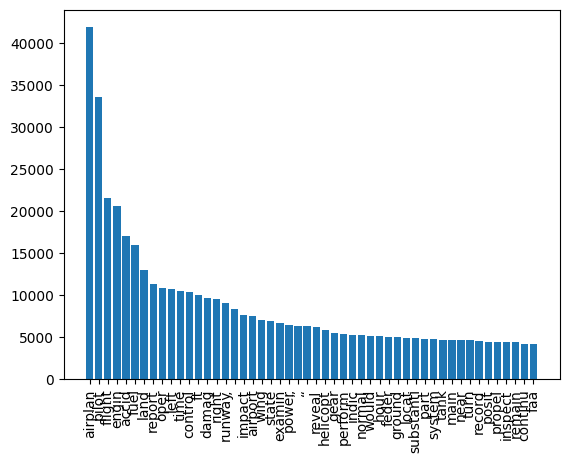

Total unique words: 49302
Define Y
Shape of label tensor: (4395,)
Define X
Found 49303 unique tokens.
Shape of data tensor: (4395, 200)
(3076, 200) (3076,)
(1319, 200) (1319,)
5    649
0    292
1    185
4    107
2     74
3     11
6      1
Name: count, dtype: int64
Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 23s 193ms/step - accuracy: 0.3707 - loss: 1.9185 - val_accuracy: 0.4805 - val_loss: 1.4045
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - accuracy: 0.4840 - loss: 1.3843 - val_accuracy: 0.4805 - val_loss: 1.3730
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - accuracy: 0.4872 - loss: 1.3578 - val_accuracy: 0.4805 - val_loss: 1.3665
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - accuracy: 0.4920 - loss: 1.3650 - val_accuracy: 0.4805 - val_loss: 1.3644
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 0.4885 - loss: 1.3693 - val_accuracy: 0.4805 - val_loss: 1.3603
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.4859 - loss: 1.3563 - v

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step


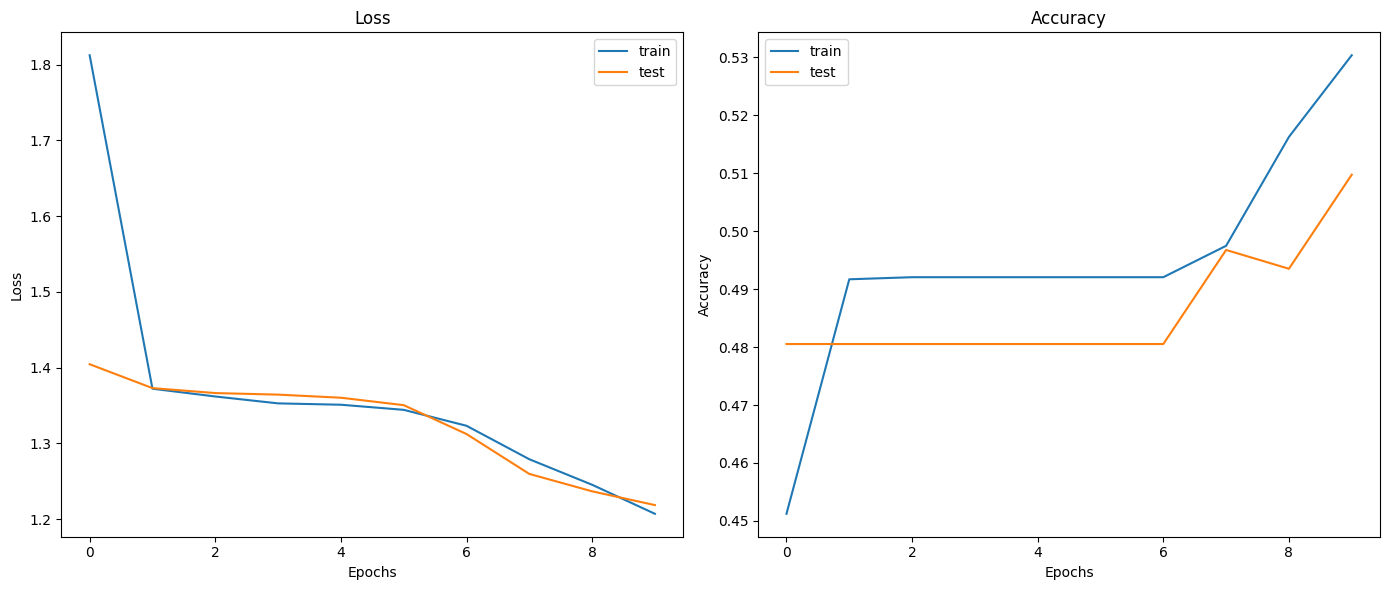

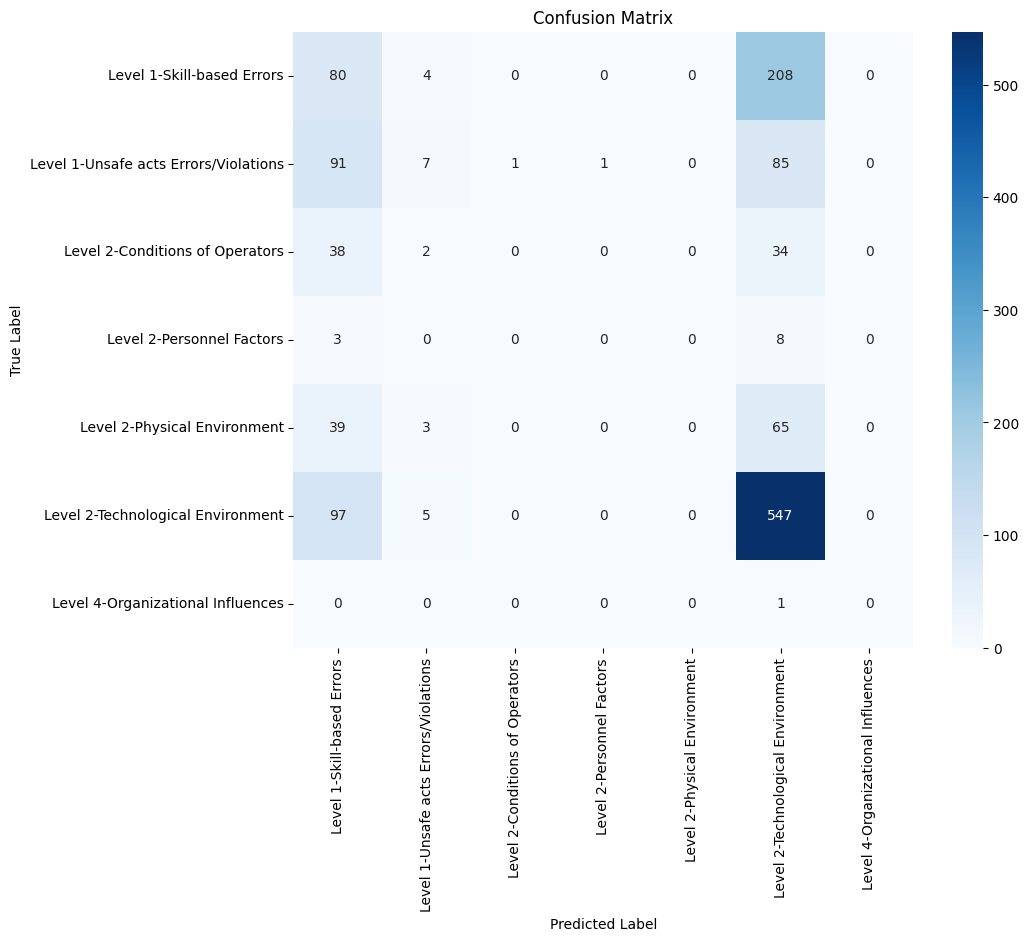

Accuracy: 0.4807
Macro F1 Score: 0.1433
Micro F1 Score: 0.4807
Weighted F1 Score: 0.4019


In [54]:
from sklearn.metrics import f1_score, accuracy_score

options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "ls_name": 'asrs_ntsb', # Due to outperform than others
    "ls_version": 1
}

# 01. Get Data
ntsb_df = CoreUtils.get_data('ntsb', from_year=2018, to_year=2023)
dfs = { 'ntsb': ntsb_df }

ntsb_lstm_Model = LSTMModel(dfs, ds_name='ntsb', options=options)
ntsb_lstm_Model.train()
ntsb_evaluate_result = ntsb_lstm_Model.evaluate()


y_true = ntsb_lstm_Model.Y_test
y_pred = ntsb_lstm_Model.Y_pred

accuracy = accuracy_score(y_true, y_pred)
macro_f1_score = f1_score(y_true, y_pred, average='macro')
micro_f1_score = f1_score(y_true, y_pred, average='micro')
weighted_f1_score = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Macro F1 Score: {macro_f1_score:.4f}')
print(f'Micro F1 Score: {micro_f1_score:.4f}')
print(f'Weighted F1 Score: {weighted_f1_score:.4f}')

## ASRS & NTSB (Combination)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (14332, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
             event_id        date  \
9992   20180129X21947  2018-01-01   
10052  20180226X85030  2018-01-01   
9969   20180122X00121  2018-01-01   
9971   20180123X55135  2018-01-01   
9972   20180124X34056  2018-01-01   

                                          finding_factor  \
9992               Aircraft-Aircraft systems-Fuel system   
10052  Personnel issues-Action/decision-Info processi...   
9969       Aircraft-Aircraft systems-Landing gear syste

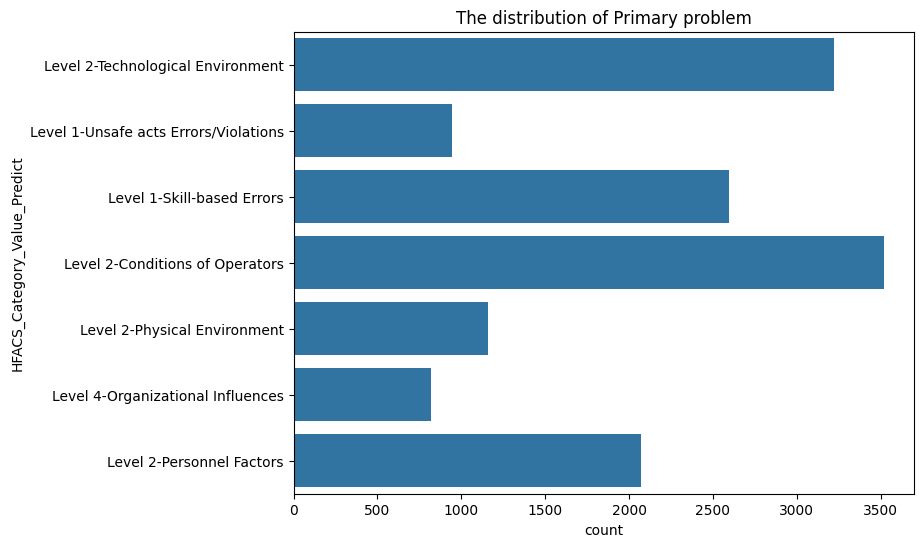

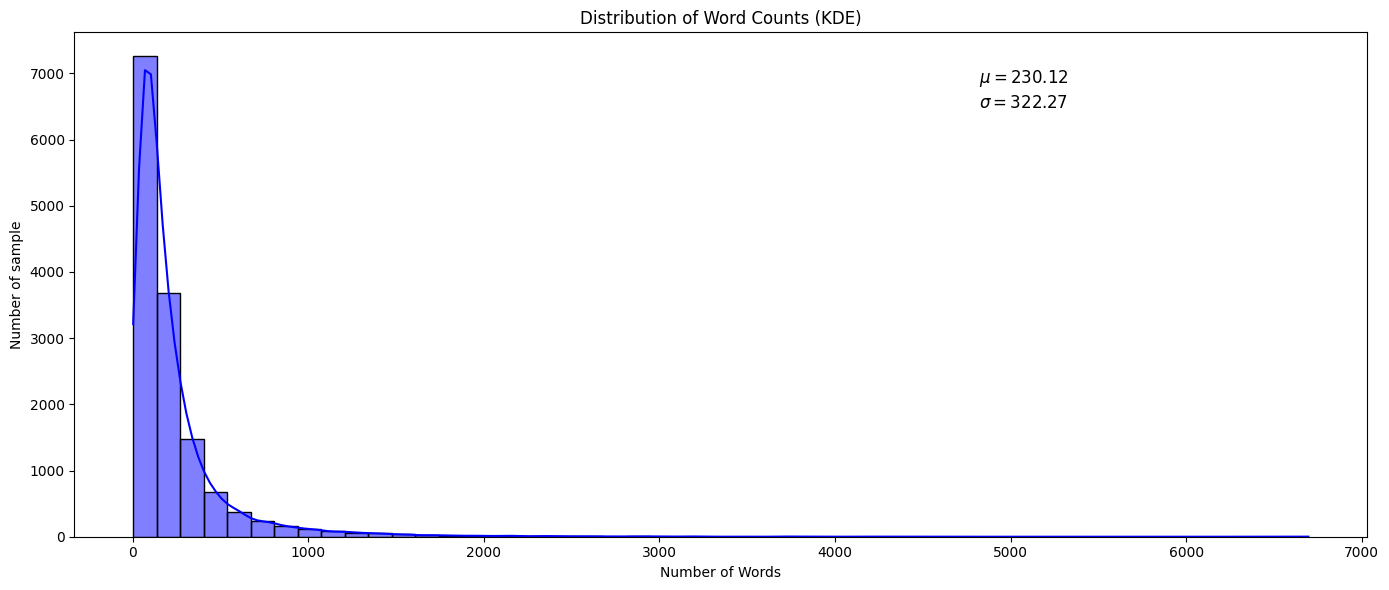

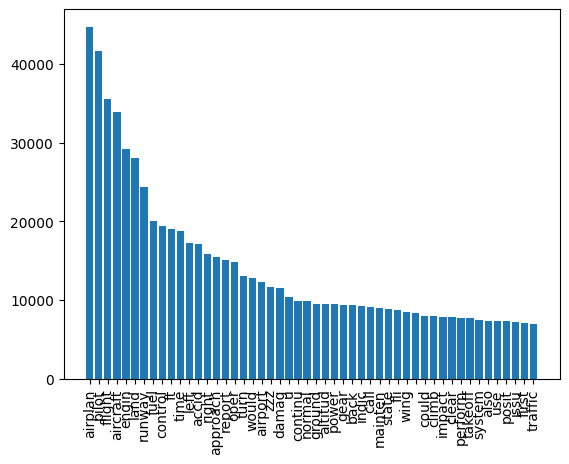

Total unique words: 67251
Define Y
Shape of label tensor: (14332,)
Define X
Found 67252 unique tokens.
Shape of data tensor: (14332, 300)
(10032, 300) (10032,)
(4300, 300) (4300,)
2    1013
5     966
0     791
3     634
4     352
1     286
6     258
Name: count, dtype: int64
Epoch 1/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 69s 227ms/step - accuracy: 0.2236 - loss: 1.9161 - val_accuracy: 0.3785 - val_loss: 1.7871
Epoch 2/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 62s 219ms/step - accuracy: 0.3226 - loss: 1.7732 - val_accuracy: 0.3934 - val_loss: 1.5828
Epoch 3/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 61s 215ms/step - accuracy: 0.3865 - loss: 1.6002 - val_accuracy: 0.3974 - val_loss: 1.5617
Epoch 4/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 62s 218ms/step - accuracy: 0.3993 - loss: 1.5517 - val_accuracy: 0.3914 - val_loss: 1.5508
Epoch 5/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 60s 214ms/step - accuracy: 0.4056 - loss: 1.5265 - val_accuracy: 0.3944 - val_loss: 1.5463
Epoch 6/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 62s 220ms/step - accuracy: 0.

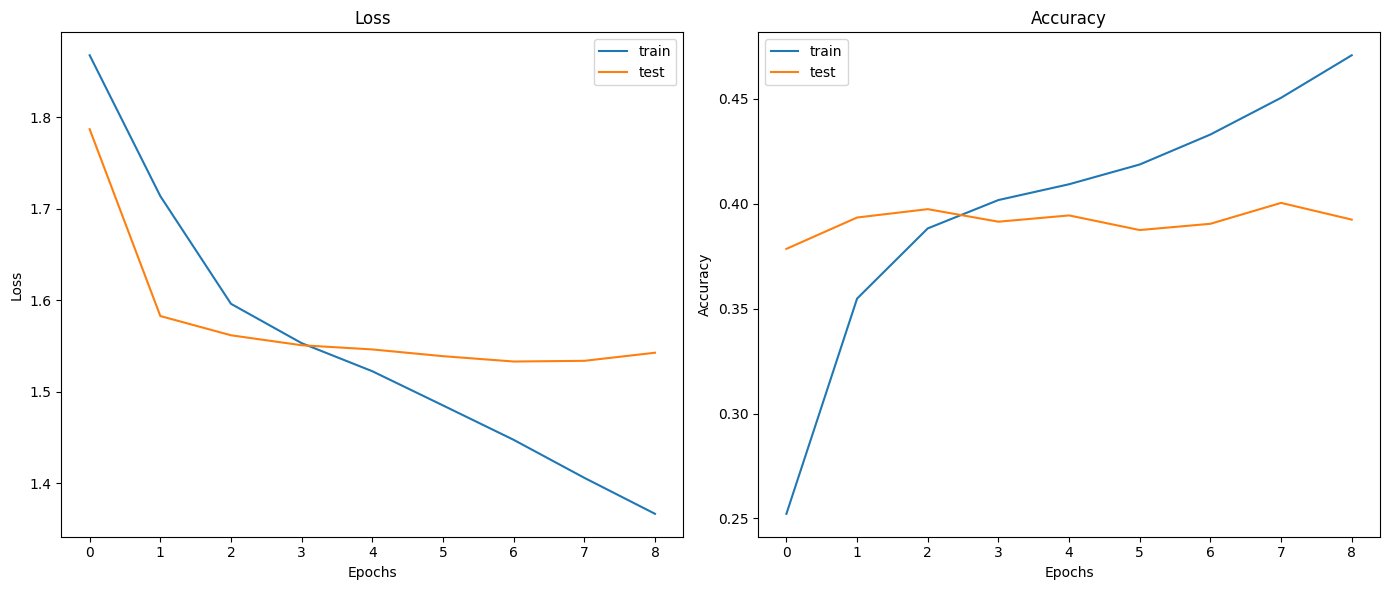

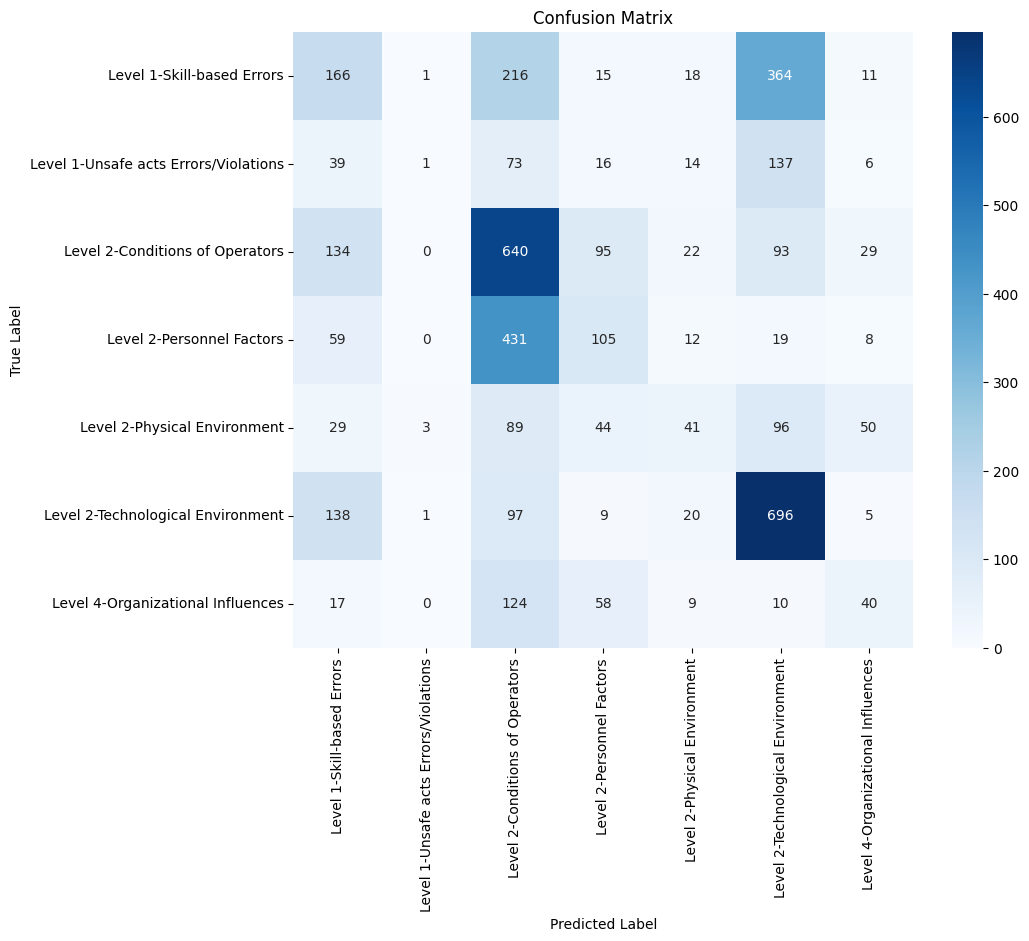

Accuracy: 0.3928
Macro F1 Score: 0.2700
Micro F1 Score: 0.3928
Weighted F1 Score: 0.3459


In [52]:

from sklearn.metrics import f1_score, accuracy_score

options = {
    "sample_size": 0, 
    "max_length": 300, 
    "max_nb_words": 50000, 
    "is_enable_smote": False,
    "ls_name": 'asrs_ntsb', # Due to outperform than others
    "ls_version": 1
}

asrs_df = CoreUtils.get_data('asrs', from_year=2022, to_year=2023)
ntsb_df = CoreUtils.get_data('ntsb', from_year=2018, to_year=2023)
asrs_ntsb_df =  pd.concat([asrs_df, ntsb_df], axis=0).reset_index(drop=True)

asrs_ntsb_df.sort_values(by='date', inplace=True)

dfs = { 'asrs_ntsb': asrs_ntsb_df }

asrs_ntsb_lstm_Model = LSTMModel(dfs, ds_name='asrs_ntsb', options=options)
asrs_ntsb_lstm_Model.train()
asrs_ntsb_evaluate_result = asrs_ntsb_lstm_Model.evaluate()


y_true = asrs_ntsb_lstm_Model.Y_test
y_pred = asrs_ntsb_lstm_Model.Y_pred

accuracy = accuracy_score(y_true, y_pred)
macro_f1_score = f1_score(y_true, y_pred, average='macro')
micro_f1_score = f1_score(y_true, y_pred, average='micro')
weighted_f1_score = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Macro F1 Score: {macro_f1_score:.4f}')
print(f'Micro F1 Score: {micro_f1_score:.4f}')
print(f'Weighted F1 Score: {weighted_f1_score:.4f}')